In [ ]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
from numpy import pi


In [ ]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
    
def teleport(state):
    circuit.initialize(state, qreg_q[0])

    circuit.h(qreg_q[1])
    circuit.cx(qreg_q[1], qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.h(qreg_q[0])

    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])

    circuit.z(qreg_q[2]).c_if(creg_c[0], 1)
    circuit.x(qreg_q[2]).c_if(creg_c[1], 1)
    
    circuit.measure(qreg_q[2], creg_c[2])

alpha = np.sqrt(.7)
beta = -np.sqrt(.3)
teleport([alpha, beta])
circuit.draw()

┌──────────────────────────────┐          ┌───┐┌─┐                      »
q_0: ┤ Initialize(0.83666,-0.54772) ├───────■──┤ H ├┤M├──────────────────────»
     └────────────┬───┬─────────────┘     ┌─┴─┐└┬─┬┘└╥┘                      »
q_1: ─────────────┤ H ├────────────────■──┤ X ├─┤M├──╫───────────────────────»
                  └───┘              ┌─┴─┐└───┘ └╥┘  ║    ┌───┐      ┌───┐   »
q_2: ────────────────────────────────┤ X ├───────╫───╫────┤ Z ├──────┤ X ├───»
                                     └───┘       ║   ║    └─╥─┘      └─╥─┘   »
                                                 ║   ║ ┌────╨────┐┌────╨────┐»
c: 3/════════════════════════════════════════════╩═══╩═╡ c_0=0x1 ╞╡ c_1=0x1 ╞»
                                                 1   0 └─────────┘└─────────┘»
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«c: 3/═╩═
«      2

In [ ]:
from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator')
circuit = transpile(circuit, backend)
job = backend.run(circuit)
teleport_result = job.result()
data = teleport_result.get_counts(circuit)

In [ ]:
data

{'000': 188,
 '001': 193,
 '111': 73,
 '100': 74,
 '011': 188,
 '010': 171,
 '101': 56,
 '110': 81}

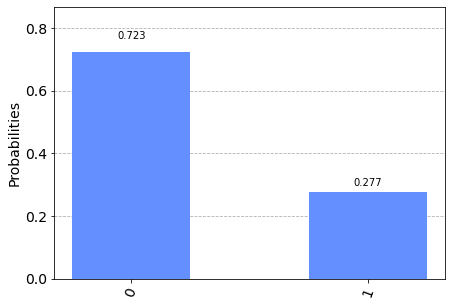

In [ ]:
import matplotlib
%matplotlib inline
alice = {}
alice['00'] = data['000'] + data['100']
alice['10'] = data['010'] + data['110']
alice['01'] = data['001'] + data['101']
alice['11'] = data['011'] + data['111']
plot_histogram(alice);

#plot bob's measurements

bob = {}
bob['0'] = data['000'] + data['010'] +  data['001'] + data['011']
bob['1'] = data['100'] + data['110'] +  data['101'] + data['111']
plot_histogram(bob)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c782e670-8153-4fc7-a9a3-0ae2dddfa952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>